In [1]:
# import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

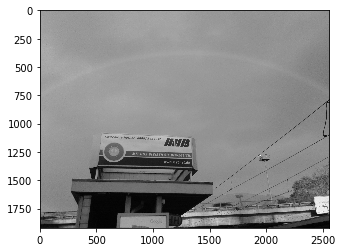

In [2]:
# read image as grayscale
img = cv2.imread('f1.jpg', 0)
#img = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(img, cmap='gray');

In [3]:
schwelle = 127
h, w, = img.shape
img_error_diffusion = img.copy()

In [4]:
# Error Diffusion
for y in range(0, h):
    for x in range(0, w):

        # Calculate binary value
        binary = (img_error_diffusion[y,x] > schwelle) * 255

        # Calculate error between pixels
        error = img_error_diffusion[y,x] - binary

        # Set current pixel to binary
        img_error_diffusion [y,x] = binary
        
        # Set neighbor pixels to binary
        if (x+1) < w:
            img_error_diffusion[y,x+1] = img_error_diffusion[y,x+1] + error * 7.0/16.0
            if (y+1) < h:
                img_error_diffusion[y+1,x+1] = img_error_diffusion[y+1,x+1] + error * 1.0/16.0
                
        if (y+1) < h:
            img_error_diffusion[y+1,x] = img_error_diffusion[y+1,x] + error * 5.0/16.0
            if 0 < x:
                img_error_diffusion[y+1,x-1] = img_error_diffusion[y+1,x-1] + error * 3.0/16.0

KeyboardInterrupt: 

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(img, cmap='gray');
axs[0].set_title('Bild');
axs[1].imshow(img_error_diffusion, cmap='gray');
axs[1].set_title('Error Diffusion Bild (4er Nachbarschaft)');

plt.savefig('Error_diffused.png')